<a href="https://colab.research.google.com/github/waseda-ken/data_analyze_kikagaku/blob/main/%E7%AB%A0%E6%9C%AB%E3%83%86%E3%82%B9%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q japanize_matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 54.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
#データの読み込み
df = pd.read_csv('hotel_reviews.csv')
df

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,女性,41,グループ,学生,3,2,2,2,3,3,3,2,3,3
9996,男性,60,個人,学生,2,4,2,1,4,4,2,1,4,3
9997,男性,33,グループ,学生,5,5,5,5,4,4,3,5,4,5
9998,女性,22,グループ,旅行,5,5,5,5,5,5,1,3,5,5


# 代表値の確認

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   性別             10000 non-null  object
 1   年齢             10000 non-null  int64 
 2   個人/グループ        10000 non-null  object
 3   旅行の目的          10000 non-null  object
 4   Wifi設備         10000 non-null  int64 
 5   送迎の便利さ         10000 non-null  int64 
 6   オンライン予約のしやすさ   10000 non-null  int64 
 7   ホテルの立地         10000 non-null  int64 
 8   食事の満足度         10000 non-null  int64 
 9   滞在時の快適さ        10000 non-null  int64 
 10  チェックイン・アウトの接客  10000 non-null  int64 
 11  その他のサービス       10000 non-null  int64 
 12  清潔さ            10000 non-null  int64 
 13  満足度            10000 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [ ]:
# 数値化（OneHotEncoding）
_df = pd.get_dummies(df, drop_first=True)
_df = _df.astype(int)
_df.head()

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,性別_男性,個人/グループ_個人,旅行の目的_ビジネス,旅行の目的_学生,旅行の目的_旅行,旅行の目的_航空関係
0,50,4,4,4,4,3,4,4,4,4,4,0,0,0,1,0,0
1,35,4,5,4,4,1,1,5,4,1,2,0,1,1,0,0,0
2,22,1,1,1,4,1,5,1,3,1,3,0,0,0,0,0,0
3,30,3,4,3,4,5,1,4,4,5,3,1,1,0,0,0,1
4,59,4,3,3,3,4,4,3,5,4,4,1,0,0,0,0,1


In [ ]:
from collections import Counter
# 数値データのみを抽出
numeric_df = df.select_dtypes(include=['number'])

# 出現回数（カテゴリデータがあれば計算）
value_counts = {col: dict(Counter(df[col])) for col in df.columns if df[col].dtype == 'O'}

# 各統計値の計算
stats = numeric_df.describe().T  # 転置して見やすくする
stats["std"] = numeric_df.std(ddof=1)  # 不偏標準偏差


# 結果の表示
print("数値データの統計情報:\n", stats)
print("\nカテゴリデータの出現回数:\n", value_counts)


数値データの統計情報:
                   count  mean   std  min   25%   50%   75%   max
年齢            10,000.00 39.49 15.18 7.00 27.00 40.00 51.00 80.00
Wifi設備        10,000.00  2.81  1.25 1.00  2.00  3.00  4.00  5.00
送迎の便利さ        10,000.00  3.10  1.48 0.00  2.00  3.00  4.00  5.00
オンライン予約のしやすさ  10,000.00  2.84  1.33 0.00  2.00  3.00  4.00  5.00
ホテルの立地        10,000.00  2.99  1.27 1.00  2.00  3.00  4.00  5.00
食事の満足度        10,000.00  3.20  1.33 0.00  2.00  3.00  4.00  5.00
滞在時の快適さ       10,000.00  3.44  1.32 1.00  2.00  4.00  5.00  5.00
チェックイン・アウトの接客 10,000.00  3.29  1.26 1.00  2.00  3.00  4.00  5.00
その他のサービス      10,000.00  3.65  1.17 1.00  3.00  4.00  5.00  5.00
清潔さ           10,000.00  3.28  1.31 0.00  2.00  3.00  4.00  5.00
満足度           10,000.00  3.20  0.97 1.00  3.00  3.00  4.00  5.00

カテゴリデータの出現回数:
 {'性別': {'女性': 5031, '男性': 4969}, '個人/グループ': {'グループ': 6798, '個人': 3202}, '旅行の目的': {'学生': 2573, 'ビジネス': 2078, 'その他': 924, '航空関係': 1384, '旅行': 3041}}


In [ ]:
stats_sorted = stats.sort_values(by="mean")  #昇順
print(stats_sorted)

                  count  mean   std  min   25%   50%   75%   max
Wifi設備        10,000.00  2.81  1.25 1.00  2.00  3.00  4.00  5.00
オンライン予約のしやすさ  10,000.00  2.84  1.33 0.00  2.00  3.00  4.00  5.00
ホテルの立地        10,000.00  2.99  1.27 1.00  2.00  3.00  4.00  5.00
送迎の便利さ        10,000.00  3.10  1.48 0.00  2.00  3.00  4.00  5.00
食事の満足度        10,000.00  3.20  1.33 0.00  2.00  3.00  4.00  5.00
満足度           10,000.00  3.20  0.97 1.00  3.00  3.00  4.00  5.00
清潔さ           10,000.00  3.28  1.31 0.00  2.00  3.00  4.00  5.00
チェックイン・アウトの接客 10,000.00  3.29  1.26 1.00  2.00  3.00  4.00  5.00
滞在時の快適さ       10,000.00  3.44  1.32 1.00  2.00  4.00  5.00  5.00
その他のサービス      10,000.00  3.65  1.17 1.00  3.00  4.00  5.00  5.00
年齢            10,000.00 39.49 15.18 7.00 27.00 40.00 51.00 80.00


In [ ]:
_df.describe()

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,性別_男性,個人/グループ_個人,旅行の目的_ビジネス,旅行の目的_学生,旅行の目的_旅行,旅行の目的_航空関係
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,39.49,2.81,3.10,2.84,2.99,3.20,3.44,3.29,3.65,3.28,3.20,0.50,0.32,0.21,0.26,0.30,0.14
std,15.18,1.25,1.48,1.33,1.27,1.33,1.32,1.26,1.17,1.31,0.97,0.50,0.47,0.41,0.44,0.46,0.35
min,7.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,27.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,40.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,4.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,51.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,4.00,1.00,1.00,0.00,1.00,1.00,0.00
max,80.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
_df.corr()

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,性別_男性,個人/グループ_個人,旅行の目的_ビジネス,旅行の目的_学生,旅行の目的_旅行,旅行の目的_航空関係
年齢,1.00,-0.00,0.04,0.01,-0.01,0.01,0.15,0.03,-0.06,0.05,0.08,0.00,-0.04,0.01,-0.01,0.00,-0.00
Wifi設備,-0.00,1.00,0.33,0.69,0.36,0.13,0.13,0.06,0.10,0.12,0.58,-0.01,-0.14,0.00,-0.01,-0.01,0.02
送迎の便利さ,0.04,0.33,1.00,0.44,0.46,-0.01,-0.00,0.10,0.05,0.00,0.13,0.01,0.26,-0.01,0.02,-0.02,0.01
オンライン予約のしやすさ,0.01,0.69,0.44,1.00,0.48,0.04,0.04,0.04,0.02,0.01,0.33,-0.01,-0.17,-0.01,0.01,-0.02,0.02
ホテルの立地,-0.01,0.36,0.46,0.48,1.00,0.01,-0.00,-0.03,0.00,-0.00,0.16,0.01,-0.02,-0.02,0.02,-0.01,0.01
食事の満足度,0.01,0.13,-0.01,0.04,0.01,1.00,0.58,0.09,0.05,0.66,0.61,0.01,-0.09,0.00,0.01,-0.01,0.00
滞在時の快適さ,0.15,0.13,-0.00,0.04,-0.00,0.58,1.00,0.19,0.08,0.67,0.79,-0.04,-0.13,0.01,0.01,-0.01,-0.01
チェックイン・アウトの接客,0.03,0.06,0.10,0.04,-0.03,0.09,0.19,1.00,0.24,0.18,0.17,0.01,0.02,0.00,0.02,-0.02,0.00
その他のサービス,-0.06,0.10,0.05,0.02,0.00,0.05,0.08,0.24,1.00,0.10,0.25,0.04,-0.04,0.01,0.00,-0.02,-0.00
清潔さ,0.05,0.12,0.00,0.01,-0.00,0.66,0.67,0.18,0.10,1.00,0.68,0.01,-0.09,0.01,0.01,-0.00,-0.00


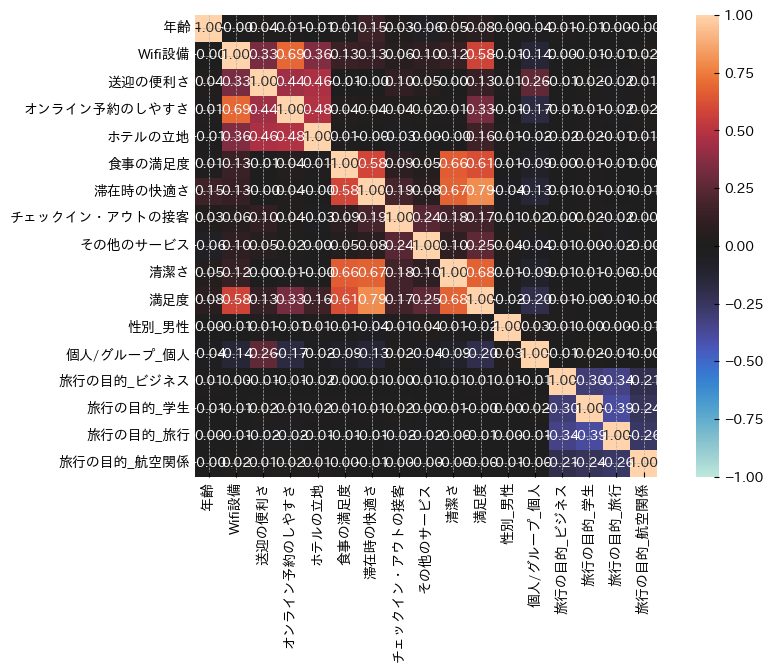

In [ ]:
# ヒートマップで可視化
sns.heatmap(_df.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

In [ ]:
# スピアマンの順位相関係数を計算
spearman_corr = numeric_df.corr(method="spearman")

In [ ]:
# 結果を表示
print("Spearmanの順位相関係数:")
print(spearman_corr)

Spearmanの順位相関係数:
                 年齢  Wifi設備  送迎の便利さ  オンライン予約のしやすさ  ホテルの立地  食事の満足度  滞在時の快適さ  \
年齢             1.00   -0.00    0.03          0.01   -0.02    0.01     0.15   
Wifi設備        -0.00    1.00    0.33          0.70    0.35    0.13     0.12   
送迎の便利さ         0.03    0.33    1.00          0.44    0.46   -0.01    -0.00   
オンライン予約のしやすさ   0.01    0.70    0.44          1.00    0.48    0.04     0.03   
ホテルの立地        -0.02    0.35    0.46          0.48    1.00    0.01    -0.00   
食事の満足度         0.01    0.13   -0.01          0.04    0.01    1.00     0.57   
滞在時の快適さ        0.15    0.12   -0.00          0.03   -0.00    0.57     1.00   
チェックイン・アウトの接客  0.03    0.06    0.11          0.03   -0.03    0.09     0.20   
その他のサービス      -0.04    0.09    0.07          0.02   -0.00    0.05     0.10   
清潔さ            0.05    0.11   -0.00          0.01   -0.00    0.65     0.66   
満足度            0.08    0.56    0.13          0.32    0.16    0.60     0.79   

               チェックイン・アウトの接客  その他のサービス   清潔さ  

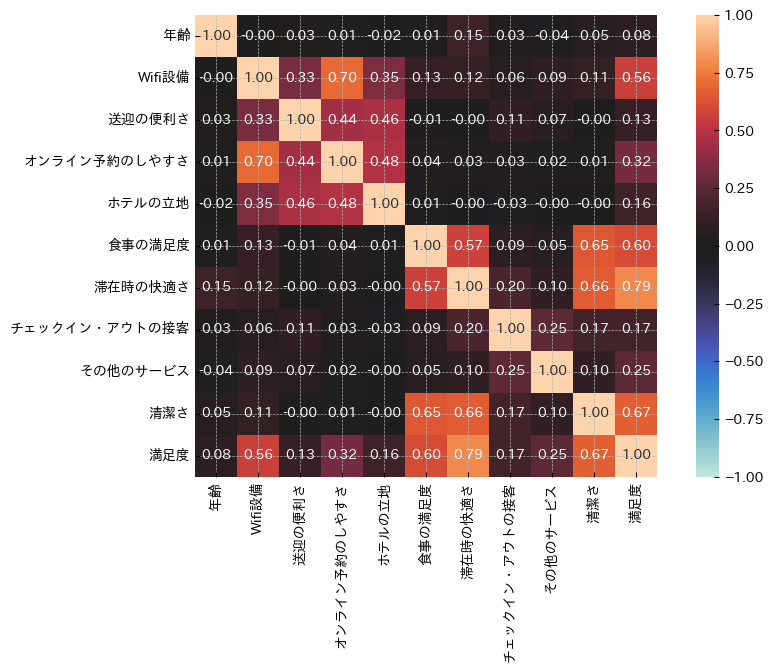

In [ ]:
# ヒートマップで可視化（スピアマン）
sns.heatmap(spearman_corr, annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

In [ ]:
# 満足度と滞在時の快適さの相関検定
corr_comfort, pval_comfort = spearmanr(numeric_df['満足度'], numeric_df['滞在時の快適さ'])
print("【満足度と滞在時の快適さ】")
print("Spearman相関係数:", corr_comfort)
print("p値:", pval_comfort)
if pval_comfort < 0.05:
    print("→ 統計的に有意な相関があります。\n")
else:
    print("→ 統計的に有意な相関はありません。\n")

# 満足度と清潔さの相関検定
corr_clean, pval_clean = spearmanr(numeric_df['満足度'], numeric_df['清潔さ'])
print("【満足度と清潔さ】")
print("Spearman相関係数:", corr_clean)
print("p値:", pval_clean)
if pval_clean < 0.05:
    print("→ 統計的に有意な相関があります。")
else:
    print("→ 統計的に有意な相関はありません。")

【満足度と滞在時の快適さ】
Spearman相関係数: 0.7886695703694965
p値: 0.0
→ 統計的に有意な相関があります。

【満足度と清潔さ】
Spearman相関係数: 0.6674895996550015
p値: 0.0
→ 統計的に有意な相関があります。


# 重回帰分析

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
# 目的変数（満足度）と説明変数（年齢とその他の数値変数）を設定
y = numeric_df['満足度']
x = numeric_df.drop(columns=['満足度'])

In [ ]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.69280789,  0.94961961,  0.60418417, ...,  0.55956515,
         0.30271115,  0.5481468 ],
       [-0.295675  ,  0.94961961,  1.27879803, ...,  1.35203809,
         0.30271115, -1.74184121],
       [-1.15236018, -1.4524536 , -1.4196574 , ..., -1.81785369,
        -0.55288848, -1.74184121],
       ...,
       [-0.42747272,  1.75031068,  1.27879803, ..., -0.2329078 ,
         1.15831078,  0.5481468 ],
       [-1.15236018,  1.75031068,  1.27879803, ..., -1.81785369,
        -0.55288848,  1.31147613],
       [-0.36157386,  0.14892854, -0.74504355, ..., -1.81785369,
        -0.55288848,  1.31147613]])

In [ ]:
multi_ols = sm.OLS(y, sm.add_constant(x_scaled))

result = multi_ols.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    満足度   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 1.101e+04
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:36:01   Log-Likelihood:                -1421.7
No. Observations:               10000   AIC:                             2865.
Df Residuals:                    9989   BIC:                             2945.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2019      0.003   1147.260      0.000       3.196       3.207
x1            -0.0026      0.003     -0.898      0.369      -0.008       0.003
x2             0.4642      0.004    117.906      0.000       0.456       0.472
x3            -0.0262      0.003     -7.942      0.000      -0.033      -0.020
x4            -0.0272      0.004     -6.463      0.000      -0.035      -0.019
x5             0.0133      0.003      3.946      0.000       0.007       0.020
x6             0.1144      0.004     29.711      0.000       0.107       0.122
x7             0.5302      0.004    133.168      0.000       0.522       0.538
x8            -0.0305      0.003    -10.331      0.000      -0.036      -0.025
x9             0.1447      0.003     49.863      0.000       0.139       0.150
x10            0.1593      0.004     37.537      0.000       0.151       0.168
==============================================================================
Omnibus:                     2684.088   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.988
Skew:                           0.029   Prob(JB):                     6.40e-97
Kurtosis:                       1.971   Cond. No.                         3.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#自由度調整済み決定係数
result.rsquared_adj

np.float64(0.9167315817815496)

In [ ]:
mask = (np.abs(result.tvalues) >= 2) & (result.pvalues <= 0.05)
mask = mask.drop('const', errors='ignore')
count_significant = mask.sum()
print(count_significant)

9


In [ ]:
tvalues_excluding_const = result.tvalues.drop('const', errors='ignore')
importance = tvalues_excluding_const.abs().sort_values(ascending=False)
print("\n変数の重要度（絶対t値の大きさが大きい順）:")
print(importance)


変数の重要度（絶対t値の大きさが大きい順）:
x7    133.17
x2    117.91
x9     49.86
x10    37.54
x6     29.71
x8     10.33
x3      7.94
x4      6.46
x5      3.95
x1      0.90
dtype: float64


# クラスタリング

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# 説明変数：年齢と満足度以外の数値変数を抽出
x = _df.select_dtypes(include=[np.number]).drop(columns=['満足度'])
# 各変数の標準化
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(x_scaled)

# クラスタの結果を元のデータに追加
_df['cluster'] = clusters

クラスタごとの代表値（数値列のみ）:
         年齢                  Wifi設備                 送迎の便利さ      ... 旅行の目的_旅行  \
        min max  mean median    min max mean median    min max  ...     mean   
cluster                                                         ...            
0         7  80 41.24  42.00      1   5 4.00   4.00      0   5  ...     0.30   
1         7  80 36.06  35.00      1   5 2.47   2.00      0   5  ...     0.30   
2         7  80 41.12  42.00      1   5 2.14   2.00      0   5  ...     0.31   

               旅行の目的_航空関係                 cluster                  
        median        min max mean median     min max mean median  
cluster                                                            
0         0.00          0   1 0.14   0.00       0   0 0.00   0.00  
1         0.00          0   1 0.14   0.00       1   1 1.00   1.00  
2         0.00          0   1 0.13   0.00       2   2 2.00   2.00  

[3 rows x 72 columns]


<Axes: ylabel='cluster'>

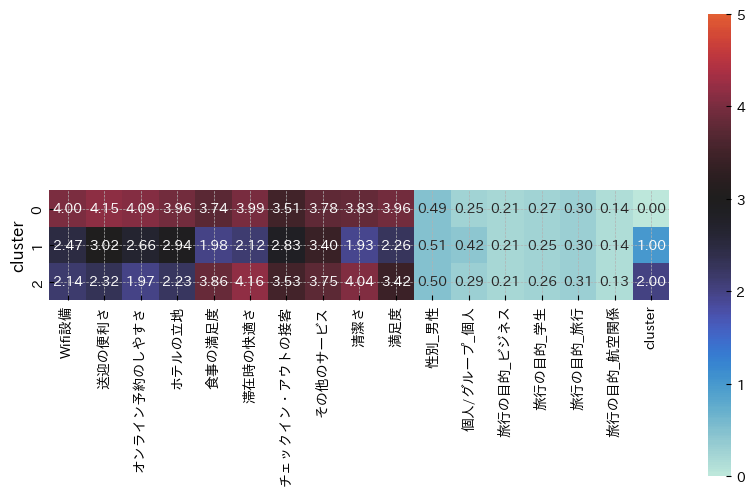

In [ ]:
# クラスタ番号の置換
cluster_mapping = {0: 1, 1: 2, 2: 0}
_df['cluster'] = df['cluster'].map(cluster_mapping)

# クラスタごとにグループ分け
groups = _df.groupby('cluster')


# 数値型の列のみを抽出（文字列型の列は除外）
numeric_cols = _df.select_dtypes(include='number').columns
groups_numeric = _df.groupby('cluster')[numeric_cols]

# 代表値の取得
agg_values = groups_numeric.agg(['min', 'max', 'mean', 'median'])
print("クラスタごとの代表値（数値列のみ）:")
print(agg_values)

# ヒートマップ用に、平均値（例として）を取得し、'年齢'列を除外
mean_values = groups_numeric.mean().drop('年齢', axis=1)
sns.heatmap(mean_values, square=True, annot=True, fmt='.2f', vmax=5.0, center=3.0, vmin=0.0)

【各クラスタの中央値】
         満足度  Wifi設備  清潔さ  食事の満足度  送迎の便利さ  オンライン予約のしやすさ  チェックイン・アウトの接客  \
cluster                                                                  
0       4.00    4.00 4.00    4.00    4.00          4.00           4.00   
1       2.00    2.00 2.00    2.00    3.00          3.00           3.00   
2       3.00    2.00 4.00    4.00    2.00          2.00           4.00   

         その他のサービス  滞在時の快適さ  性別_男性  個人/グループ_個人  旅行の目的_ビジネス  旅行の目的_学生  旅行の目的_旅行  \
cluster                                                                         
0            4.00     4.00   0.00        0.00        0.00      0.00      0.00   
1            4.00     2.00   1.00        0.00        0.00      0.00      0.00   
2            4.00     4.00   0.00        0.00        0.00      0.00      0.00   

         旅行の目的_航空関係  
cluster              
0              0.00  
1              0.00  
2              0.00  


<Axes: ylabel='cluster'>

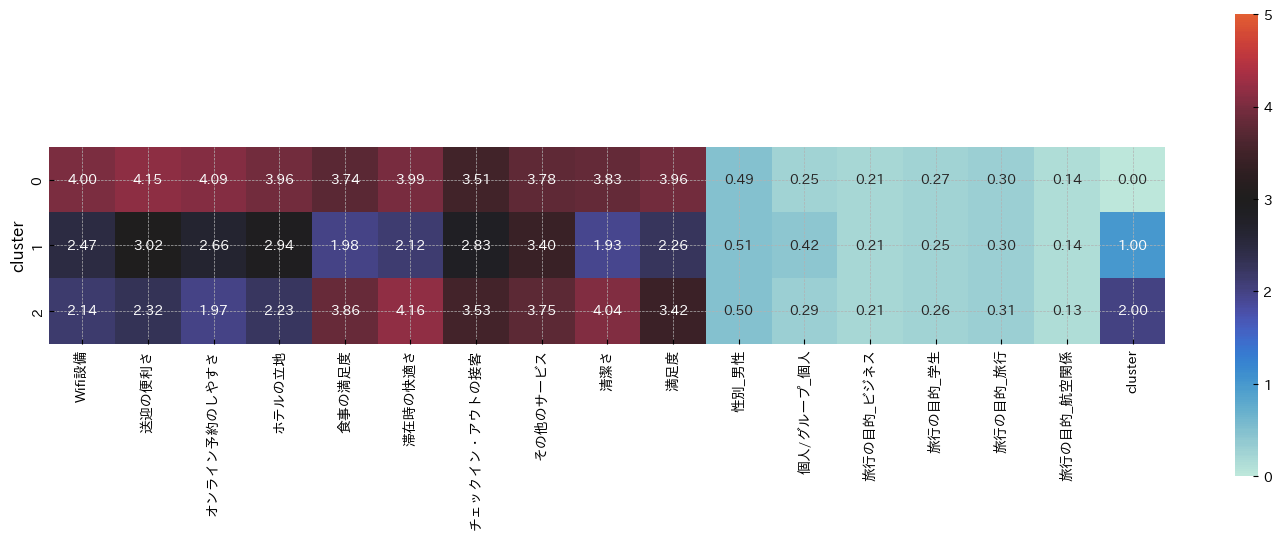

In [ ]:
key_cols = [
    "満足度",
    "Wifi設備",
    "清潔さ",
    "食事の満足度",
    "送迎の便利さ",
    "オンライン予約のしやすさ",
    "チェックイン・アウトの接客",
    "その他のサービス",
    "滞在時の快適さ",
    "性別_男性",
    "個人/グループ_個人",
    "旅行の目的_ビジネス",
    "旅行の目的_学生" ,
    "旅行の目的_旅行",
    "旅行の目的_航空関係"
]
# クラスタごとの各評価項目の中央値を算出
cluster_medians =   _df.groupby("cluster")[key_cols].median()
print("【各クラスタの中央値】")
print(cluster_medians)

sns.heatmap(mean_values, square=True, annot=True, fmt='.2f', vmax=5.0, center=3.0, vmin=0.0)

In [ ]:
# 箱ひげ図可視化用の関数
def box_plot(col1, col2, dflist, high=6, width=18):
    plt.rcParams['figure.figsize'] = width, high

    for i, cluster in enumerate(dflist):
        plt.subplot(1, len(dflist), i+1)
        plt.title(f'クラスター{i}：{col1}と{col2}')
        sns.boxplot(x=col1, y=col2, data=cluster)
        plt.tight_layout();

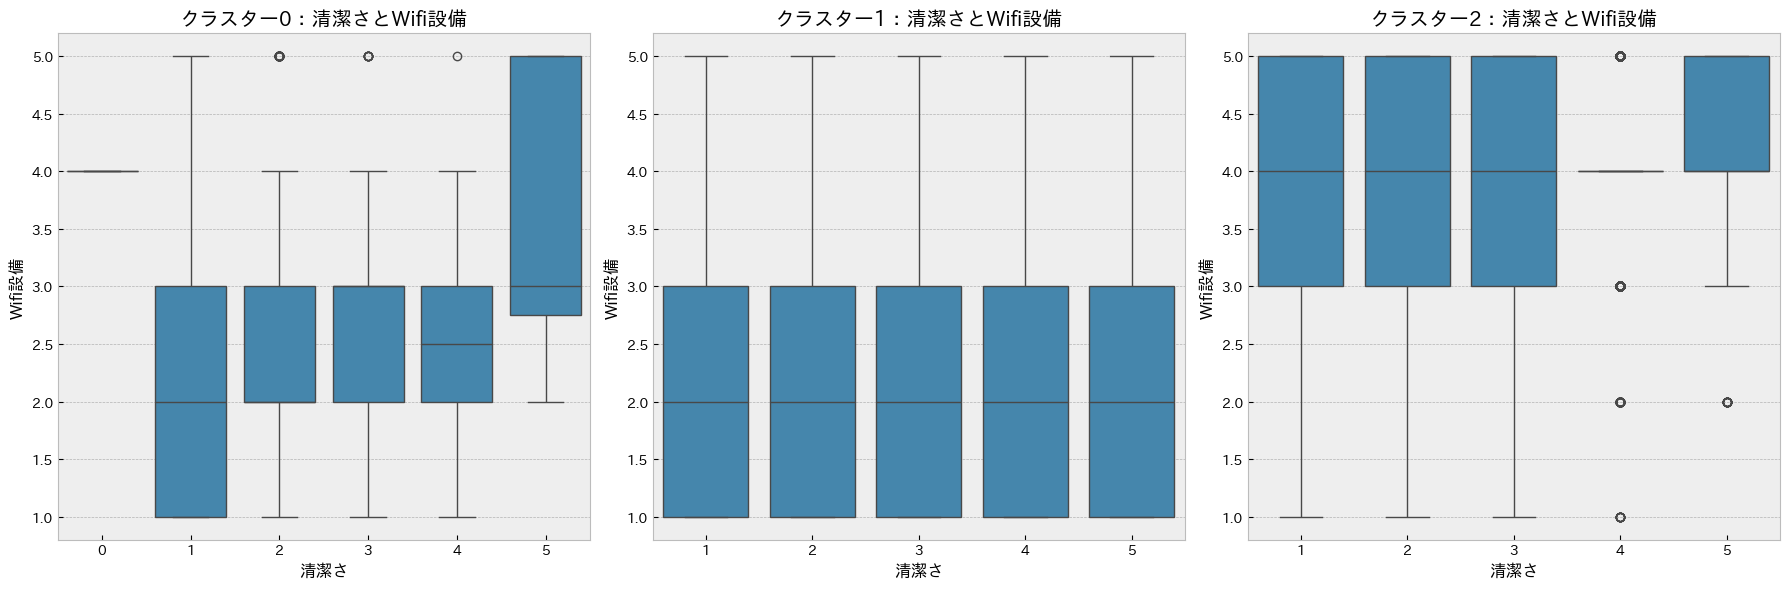

In [ ]:
# 各クラスタごとのデータフレームを定義する
cluster_0 = df[df['cluster'] == 0]
cluster_1 = df[df['cluster'] == 1]
cluster_2 = df[df['cluster'] == 2]
_df_list = [cluster_0, cluster_1, cluster_2]
box_plot('清潔さ', 'Wifi設備', _df_list)

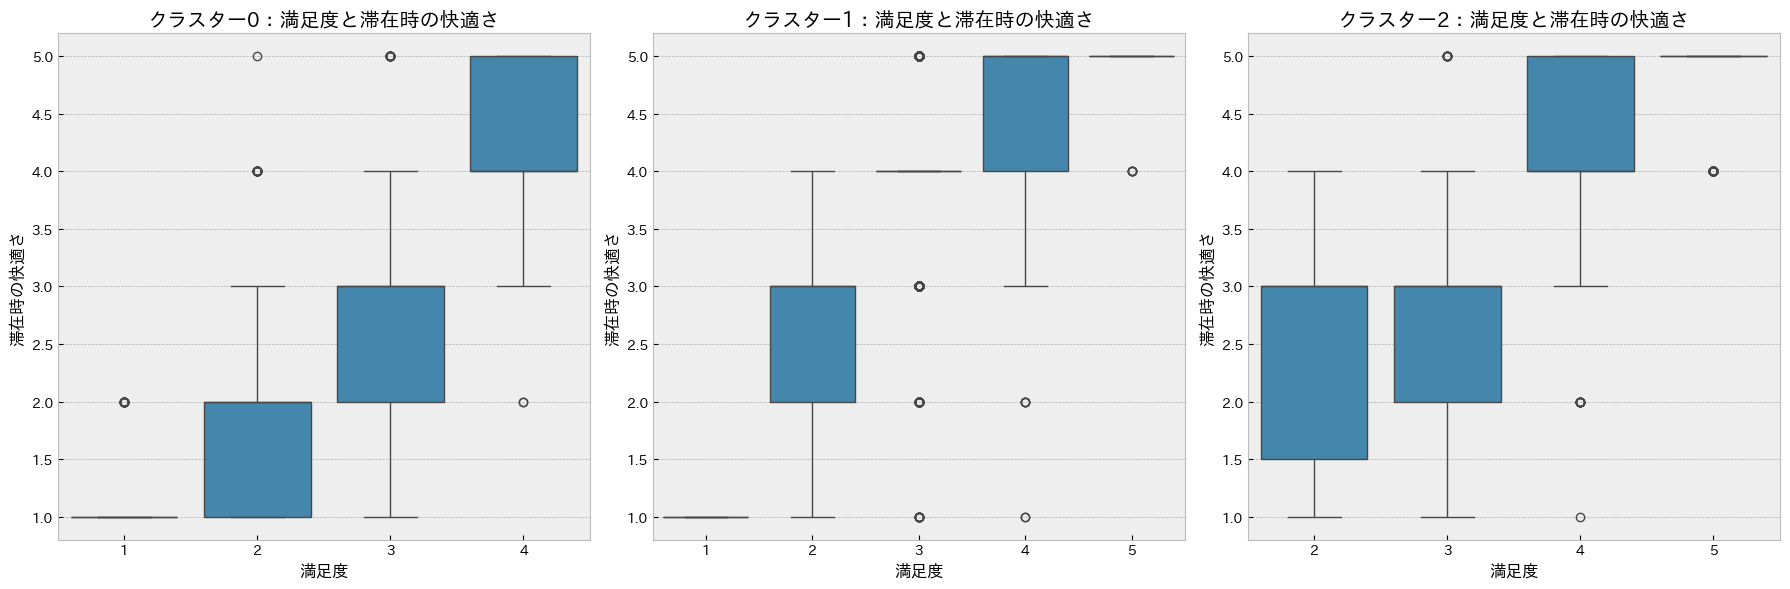

In [ ]:
box_plot('満足度', '滞在時の快適さ', _df_list)

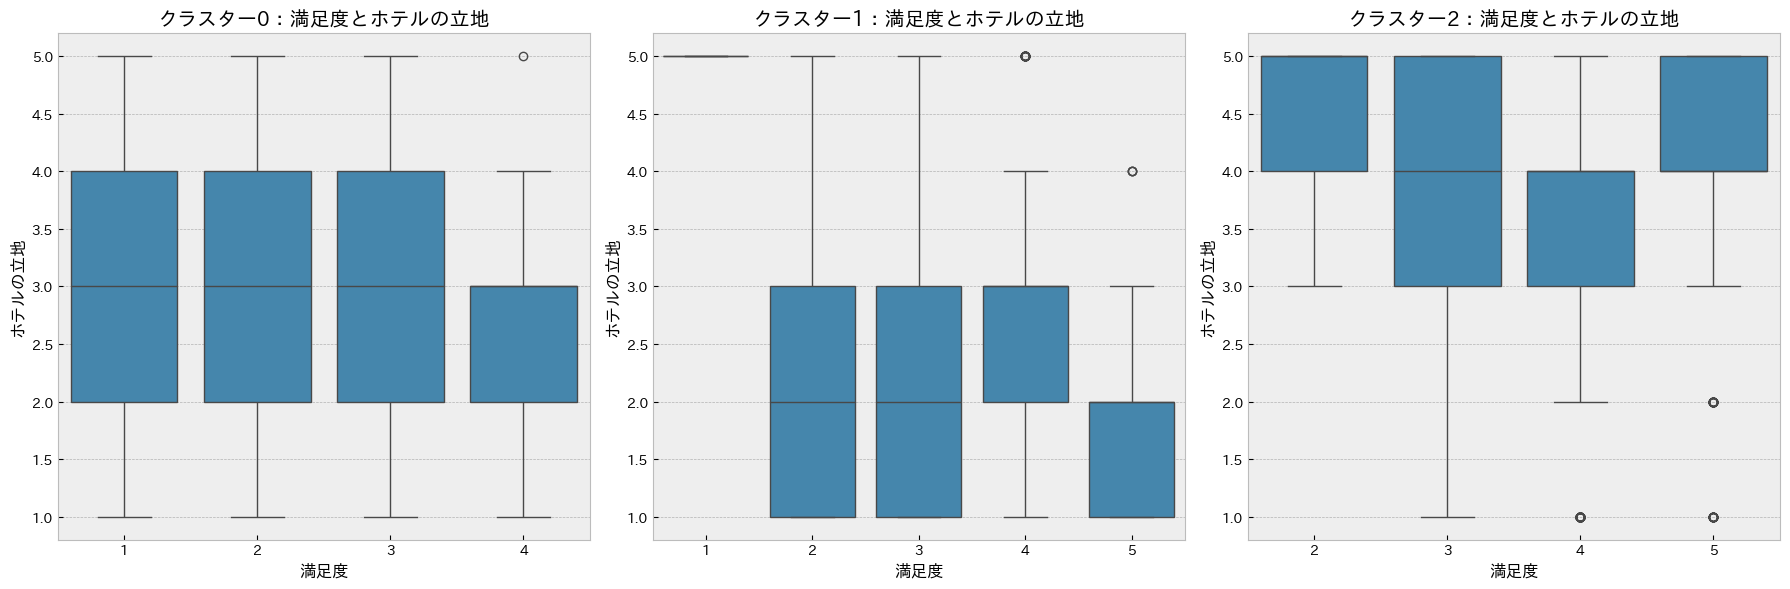

In [ ]:
box_plot('満足度', 'ホテルの立地', _df_list)
